# Notre Dame Rocket Team Rocket 2020

Launched at 19045-18879 Avery Rd, Three Oaks, MI 49128.
Permission to use flight data given by Brooke Mumma, 2020.

Import Results (23rd feb)

1. Measured Stability Margin 2.875 cal
2. Official Target Altitude 4,444 ft
3. Measured Altitude 4,320 ft or 1316.736 m
4. Drift: 2275 ft


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Importing libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter

from rocketpy import Environment, Flight, Function, Rocket, SolidMotor

In [3]:
plt.style.use("seaborn-v0_8-dark-palette")

## RocketPy Simulation


Define a dictionary with the inputs for the simulation


In [4]:
parameters = {
    # Mass Details
    "rocket_mass": (18.998, 0.010),  # Rocket dry mass: 20.846 kg
    # propulsion details
    "motor_structure_mass": (1.848, 0.1),
    "burn_time": (3.433, 0.1),
    "nozzle_radius": (0.02475, 0.001),
    "throat_radius": (0.01075, 0.001),
    "grain_separation": (0.003, 0.001),
    "grain_density": (1519.708, 30),
    "grain_outer_radius": (0.033, 0.001),
    "grain_initial_inner_radius": (0.015, 0.002),
    "grain_initial_height": (0.12, 0.001),
    "grains_center_of_mass_position": (-0.35, 0.100),
    "nozzle_position": (0, 0.100),
    "motor_position": (3.391, 0.100),
    # aerodynamic details
    "center_of_mass_without_motor": (1.3, 0.100),
    "drag_coefficient": (0.44, 0.1),
    "inertia_i": (73.316, 0.3 * 73.316),
    "inertia_z": (0.15982, 0.3 * 0.15982),
    "radius": (0.1015, 0.001),
    "power_off_drag": (1, 0.033),
    "power_on_drag": (1, 0.033),
    ## nose cone
    "nose_length": (0.610, 0.001),
    "nose_radius": (0.1015, 0.001),
    "nose_position": (0, 0.100),
    ## fins
    "fin_span": (0.165, 0.001),
    "fin_root_chord": (0.152, 0.001),
    "fin_tip_chord": (0.0762, 0.001),
    "fin_sweep_angle": (13, 0.5),
    "fin_position": (3.050, 0.100),
    ## transitions
    "transition_top_radius": (0.1015, 0.010),
    "transition_bottom_radius": (0.0775, 0.010),
    "transition_length": (0.127, 0.010),
    "transition_position": (1.2, 0.010),
    # launch and environment details
    "wind_direction": (0, 3),
    "wind_speed": (1, 0.30),
    "inclination": (90, 1),
    "heading": (181, 3),
    "rail_length": (3.353, 0.001),
    # parachute details
    "cd_s_drogue": (1.5 * np.pi * (24 * 25.4 / 1000) * (24 * 25.4 / 1000) / 4, 0.1),
    "cd_s_main": (2.2 * np.pi * (120 * 25.4 / 1000) * (120 * 25.4 / 1000) / 4, 0.1),
    "lag_rec": (1, 0.5),
}

# rocket: nose_to_tail

### Environment


Define the `Environment` object


In [6]:
# Environment conditions
env = Environment(
    gravity=9.81,
    latitude=41.775447,
    longitude=-86.572467,
    date=(2020, 2, 23, 16),
    elevation=206,
)

env.set_atmospheric_model(
    type="Reanalysis",
    file="../../data/weather/ndrt_2020_weather_data_ERA5.nc",
    dictionary="ECMWF",
)

Visualize the `Environment` object


In [7]:
# env.info()

### Motor


Define the `SolidMotor` object


In [9]:
motor_l1395 = SolidMotor(
    thrust_source="../../data/motors/cesaroni/Cesaroni_4895L1395-P.eng",
    burn_time=parameters.get("burn_time")[0],
    dry_mass=parameters.get("motor_structure_mass")[0],
    dry_inertia=(0, 0, 0),
    center_of_dry_mass_position=parameters.get("grains_center_of_mass_position")[0],
    grains_center_of_mass_position=parameters.get("grains_center_of_mass_position")[0],
    grain_number=5,
    grain_separation=parameters.get("grain_separation")[0],
    grain_density=parameters.get("grain_density")[0],
    grain_outer_radius=parameters.get("grain_outer_radius")[0],
    grain_initial_inner_radius=parameters.get("grain_initial_inner_radius")[0],
    grain_initial_height=parameters.get("grain_initial_height")[0],
    nozzle_radius=parameters.get("nozzle_radius")[0],
    throat_radius=parameters.get("throat_radius")[0],
    interpolation_method="linear",
    nozzle_position=parameters.get("nozzle_position")[0],
    coordinate_system_orientation="combustion_chamber_to_nozzle",  # combustion_chamber_to_nozzle"
)

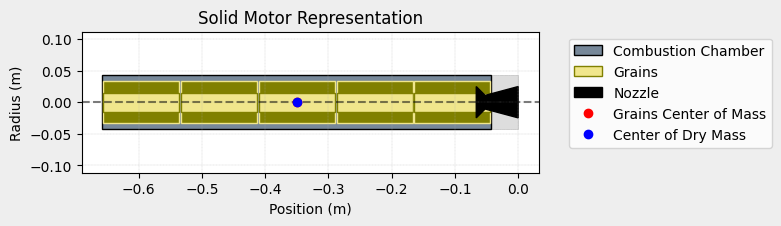

In [10]:
motor_l1395.plots.draw()

Nozzle Details
Nozzle Radius: 0.02475 m
Nozzle Throat Radius: 0.01075 m

Grain Details
Number of Grains: 5
Grain Spacing: 0.003 m
Grain Density: 1519.708 kg/m3
Grain Outer Radius: 0.033 m
Grain Inner Radius: 0.015 m
Grain Height: 0.12 m
Grain Volume: 0.000 m3
Grain Mass: 0.495 kg

Motor Details
Total Burning Time: 3.433 s
Total Propellant Mass: 2.475 kg
Average Propellant Exhaust Velocity: 1977.740 m/s
Average Thrust: 1425.839 N
Maximum Thrust: 1800.0 N at 0.1 s after ignition.
Total Impulse: 4894.905 Ns



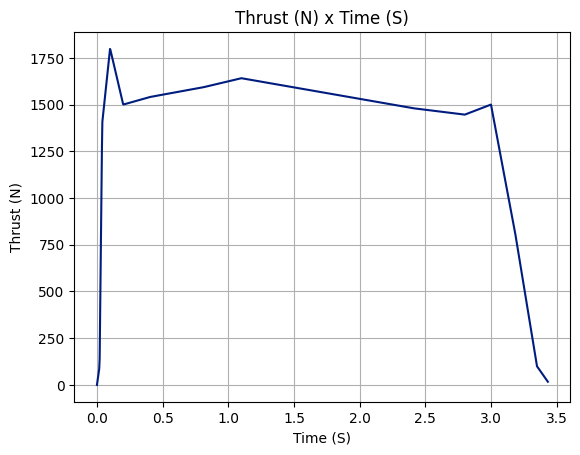

In [11]:
motor_l1395.info()

### Rocket


Create the `Rocket` object


In [12]:
ndrt2020 = Rocket(
    radius=parameters.get("radius")[0],
    mass=parameters.get("rocket_mass")[0],
    inertia=(
        parameters.get("inertia_i")[0],
        parameters.get("inertia_i")[0],
        parameters.get("inertia_z")[0],
    ),
    power_off_drag=parameters.get("drag_coefficient")[0],
    power_on_drag=parameters.get("drag_coefficient")[0],
    center_of_mass_without_motor=parameters.get("center_of_mass_without_motor")[0],
    coordinate_system_orientation="nose_to_tail",
)
ndrt2020.set_rail_buttons(1.5, 2, 45)

ndrt2020.add_motor(motor=motor_l1395, position=parameters.get("motor_position")[0])

Adding aerodynamic surfaces


In [13]:
nose_cone = ndrt2020.add_nose(
    length=parameters.get("nose_length")[0],
    kind="tangent",
    position=parameters.get("nose_position")[0],
)
fin_set = ndrt2020.add_trapezoidal_fins(
    4,
    span=parameters.get("fin_span")[0],
    root_chord=parameters.get("fin_root_chord")[0],
    tip_chord=parameters.get("fin_tip_chord")[0],
    position=parameters.get("fin_position")[0],
    sweep_angle=parameters.get("fin_sweep_angle")[0],
    radius=parameters.get("transition_bottom_radius")[0],
)
transition = ndrt2020.add_tail(
    top_radius=parameters.get("transition_top_radius")[0],
    bottom_radius=parameters.get("transition_bottom_radius")[0],
    length=parameters.get("transition_length")[0],
    position=parameters.get("transition_position")[0],
)

Adding Parachute


In [14]:
drogue = ndrt2020.add_parachute(
    "Drogue",
    cd_s=parameters.get("cd_s_drogue")[0],
    trigger="apogee",
    sampling_rate=105,
    lag=parameters.get("lag_rec")[0],
    noise=(0, 8.3, 0.5),
)
main = ndrt2020.add_parachute(
    "Main",
    cd_s=parameters.get("cd_s_main")[0],
    trigger=167.64,
    sampling_rate=105,
    lag=parameters.get("lag_rec")[0],
    noise=(0, 8.3, 0.5),
)

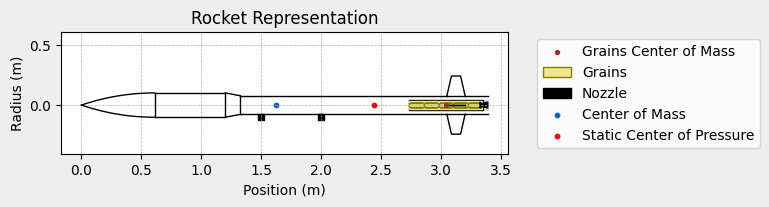

In [15]:
ndrt2020.draw()

In [16]:
ndrt2020.info()


Inertia Details

Rocket Mass: 18.998 kg (without motor)
Rocket Dry Mass: 20.846 kg (with unloaded motor)
Rocket Loaded Mass: 23.321 kg
Rocket Inertia (with unloaded motor) 11: 78.421 kg*m2
Rocket Inertia (with unloaded motor) 22: 78.421 kg*m2
Rocket Inertia (with unloaded motor) 33: 0.160 kg*m2
Rocket Inertia (with unloaded motor) 12: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 13: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 23: 0.000 kg*m2

Geometrical Parameters

Rocket Maximum Radius: 0.1015 m
Rocket Frontal Area: 0.032365 m2

Rocket Distances
Rocket Center of Dry Mass - Center of Mass without Motor: 0.154 m
Rocket Center of Dry Mass - Nozzle Exit: 1.937 m
Rocket Center of Dry Mass - Center of Propellant Mass: 1.587 m
Rocket Center of Mass - Rocket Loaded Center of Mass: 0.168 m


Aerodynamics Lift Coefficient Derivatives

Nose Cone Lift Coefficient Derivative: 2.000/rad
Tail Lift Coefficient Derivative: -0.834/rad
Fins Lift Coefficient Derivative: 5.057/rad

Center of Pr

### Flight


In [17]:
# Flight
flight = Flight(
    rocket=ndrt2020,
    environment=env,
    rail_length=parameters.get("rail_length")[0],
    inclination=parameters.get("inclination")[0],
    heading=parameters.get("heading")[0],
)


Initial Conditions

Initial time: 0.000 s
Position - x: 0.00 m | y: 0.00 m | z: 206.00 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude (quaternions) - e0: -0.391 | e1: 0.000 | e2: 0.000 | e3: -0.921
Euler Angles - Spin φ : -293.00° | Nutation θ: 0.00° | Precession ψ: 67.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s | ω3: 0.00 rad/s
Initial Stability Margin: 4.017 c


Surface Wind Conditions

Frontal Surface Wind Speed: -5.04 m/s
Lateral Surface Wind Speed: 2.57 m/s


Launch Rail

Launch Rail Length: 3.353 m
Launch Rail Inclination: 90.00°
Launch Rail Heading: 181.00°


Rail Departure State

Rail Departure Time: 0.253 s
Rail Departure Velocity: 13.044 m/s
Rail Departure Stability Margin: 4.072 c
Rail Departure Angle of Attack: 23.546°
Rail Departure Thrust-Weight Ratio: 6.657
Rail Departure Reynolds Number: 2.061e+05


Burn out State

Burn out time: 3.433 s
Altitude at burn out: 533.391 m (ASL) | 327.391 m (AGL)
Rocket speed at burn out: 170.838 m/s
Freestream

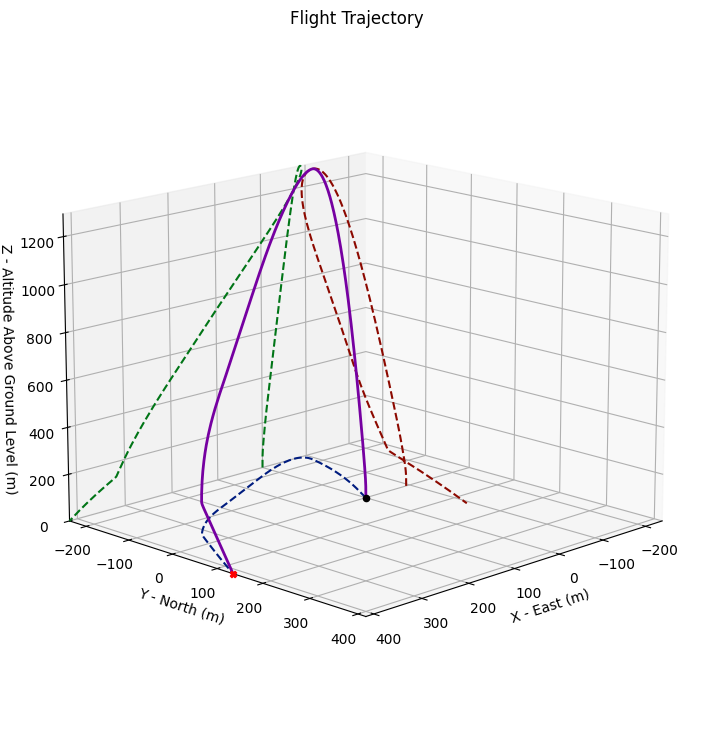

In [18]:
flight.info()
flight.plots.trajectory_3d()

## Comparison with the real flight data


Load the available flight data: altitude above ground level (m), vertical velocity (m/s), time (s)


In [20]:
flight_data = np.loadtxt(
    "../../data/rockets/NDRT_2020/ndrt_2020_flight_data.csv",
    skiprows=1,
    delimiter=",",
    usecols=(3, 4),  # 3: Time (s); 4: Altitude (Ft-AGL)
)

# TODO: In the future, we could also use the axial acceleration data to compare against the simulation

Convert to Function objects


In [21]:
actual_z = Function(
    source=np.column_stack((flight_data[:, 0], flight_data[:, 1] / 3.281)),
    inputs="Time (s)",
    outputs="Altitude above ground level (m)",
    interpolation="linear",
    extrapolation="zero",
)  # the division by 3.281 is to convert from feet to meters

In [22]:
# Calculate the actual vertical velocity as the derivative of the altitude
actual_vz = actual_z.derivative_function()
actual_vz_filtered = Function(
    source=np.column_stack(
        (actual_vz.source[:, 0], savgol_filter(actual_vz.source[:, 1], 51, 3))
    ),
    inputs="Time (s)",
    outputs="Vertical velocity (m/s)",
    interpolation="linear",
    extrapolation="zero",
)

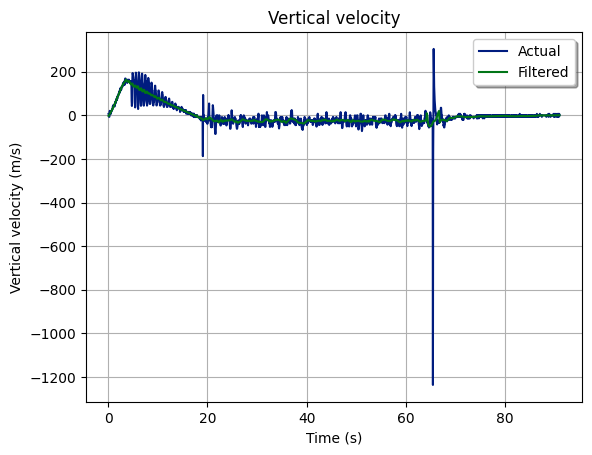

In [23]:
Function.compare_plots(
    plot_list=[(actual_vz, "Actual"), (actual_vz_filtered, "Filtered")],
    ylabel="Vertical velocity (m/s)",
    title="Vertical velocity",
    xlabel="Time (s)",
)

In [24]:
# the actual vertical velocity will be calculated as the derivative of the altitude
actual_az = actual_vz_filtered.derivative_function()

actual_az_filtered = Function(
    source=np.column_stack(
        (actual_az.source[:, 0], savgol_filter(actual_az.source[:, 1], 51, 3))
    ),
    inputs="Time (s)",
    outputs="Vertical acceleration (m/s^2)",
    interpolation="linear",
    extrapolation="zero",
)

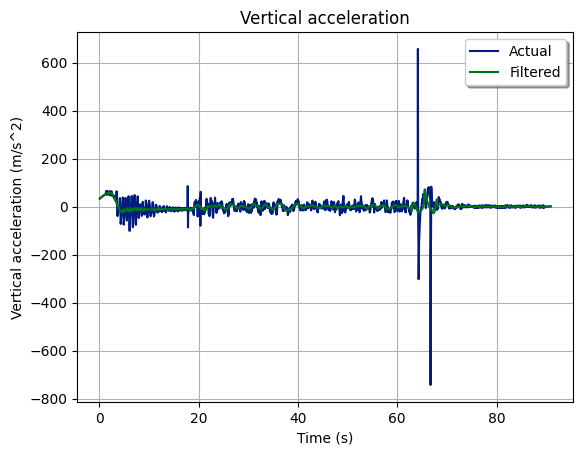

In [25]:
Function.compare_plots(
    plot_list=[(actual_az, "Actual"), (actual_az_filtered, "Filtered")],
    ylabel="Vertical acceleration (m/s^2)",
    title="Vertical acceleration",
    xlabel="Time (s)",
)

Get the simulated results


In [26]:
simulated_z = flight.z - env.elevation
simulated_vz = flight.vz
simulated_az = flight.az
simulated_t_final = flight.t_final
simulated_apogee = flight.apogee - env.elevation

### Plots comparison


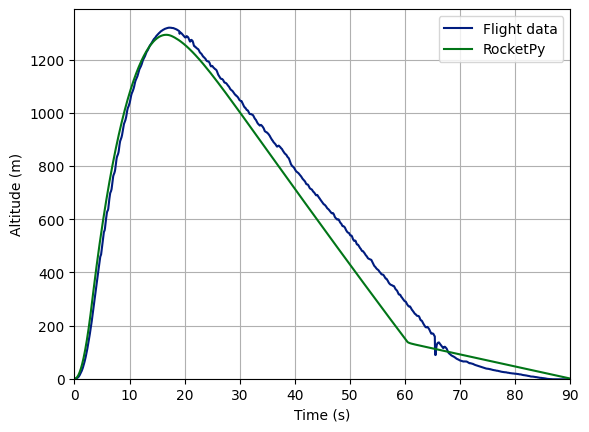

In [27]:
plt.plot(actual_z[:, 0], actual_z[:, 1], label="Flight data")
plt.plot(simulated_z[:, 0], simulated_z[:, 1], label="RocketPy")
plt.xlabel("Time (s)")
plt.ylabel("Altitude (m)")
plt.ylim(0, 1390)
plt.xlim(0, round(simulated_t_final, -1))
plt.legend()
plt.grid()
plt.show()

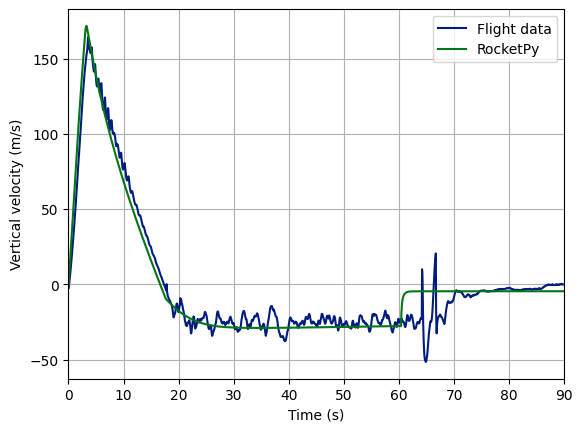

In [28]:
plt.plot(actual_vz_filtered[:, 0], actual_vz_filtered[:, 1], label="Flight data")
plt.plot(simulated_vz[:, 0], simulated_vz[:, 1], label="RocketPy")
plt.xlabel("Time (s)")
plt.ylabel("Vertical velocity (m/s)")
plt.xlim(0, round(simulated_t_final, -1))
plt.legend()
plt.grid()
plt.show()

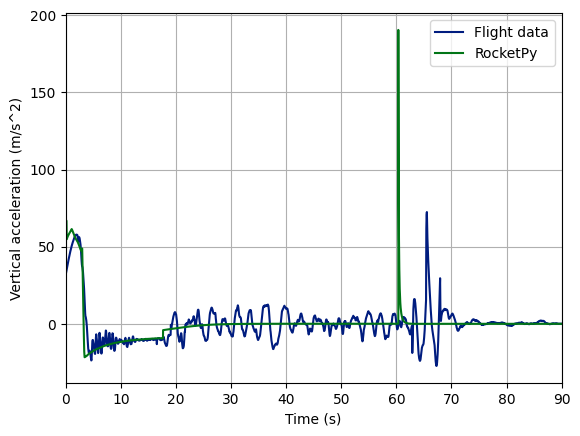

In [29]:
plt.plot(actual_az_filtered[:, 0], actual_az_filtered[:, 1], label="Flight data")
plt.plot(simulated_az[:, 0], simulated_az[:, 1], label="RocketPy")
plt.xlabel("Time (s)")
plt.ylabel("Vertical acceleration (m/s^2)")
plt.xlim(0, round(simulated_t_final, -1))
plt.legend()
plt.grid()
plt.show()

### Numerical comparison


In [30]:
print("Apogee (AGL)")
print(f"RocketPy: {simulated_apogee:.2f} m")
print(f"Real data: {actual_z.max:.2f} m")
diff = abs(actual_z.max - simulated_apogee)
print(f"Absolute error: {diff:.2f} m")
print(f"Relative error: {diff / actual_z.max * 100:.2f} %")

Apogee (AGL)
RocketPy: 1293.43 m
Real data: 1320.29 m
Absolute error: 26.86 m
Relative error: 2.03 %


In [31]:
print("Max Velocity")
print(f"RocketPy:  {simulated_vz.max:.2f} m/s")
print(f"Real data: {actual_vz_filtered.max:.2f} m/s")
velocity_error = simulated_vz.max - actual_vz_filtered.max
print(f"Absolute error: {velocity_error:.2f} m/s")
relative_error = abs(velocity_error) / actual_vz_filtered.max * 100
print(f"Relative error: {relative_error:.2f} %")

Max Velocity
RocketPy:  171.65 m/s
Real data: 164.21 m/s
Absolute error: 7.43 m/s
Relative error: 4.53 %


In [32]:
print("Max Acceleration (before parachute deployment)")

# For some reason, the acceleration data gets a shock at the deployment of a parachute
# We will investigate the acceleration data before the parachute deployment
# For pragmatical reasons, we will consider the parachute deployment to be at the half of the flight

# Compute the maximum acceleration for the first half of the flight
simulated_half_length = len(simulated_az) // 2
max_simulated_az = np.max(simulated_az[:, 1][:simulated_half_length])

actual_half_length = len(actual_az_filtered) // 2
max_actual_az_filtered = np.max(actual_az_filtered[:, 1][:actual_half_length])

# Print the results
print(f"RocketPy: {max_simulated_az:.2f} m/s²")
print(f"Real data: {actual_az_filtered.max:.2f} m/s²")

# Compute and print the errors
acceleration_error = max_simulated_az - actual_az_filtered.max
print(f"Absolute error: {acceleration_error:.2f} m/s^2")
relative_error = abs(acceleration_error) / actual_az_filtered.max * 100
print(f"Relative error: {relative_error:.2f} %")

Max Acceleration (before parachute deployment)
RocketPy: 67.08 m/s²
Real data: 72.45 m/s²
Absolute error: -5.36 m/s^2
Relative error: 7.40 %


In [33]:
# 1. Measured Stability Margin 2.875 cal
# 2. Official Target Altitude 4,444 ft
# 3. Measured Altitude 4,320 ft or 1316.736 m
# 4. Drift: 2275 ft